In [5]:
from pymongo import MongoClient
from geopy.distance import vincenty

# connect to mongodb
client = MongoClient("localhost", 27017)
db = client["twitter"]

# get the tweet cursor
cursor = db.tweets.find({}, {'timestamp_obj': 1})

count = 0
dates = []
for d in cursor:
    dates.append(d['timestamp_obj'])
    count += 1
    if count % 500000 == 0:
        print(count)

500000
1000000
1500000
2000000
2500000
3000000
3500000
4000000
4500000
5000000
5500000
6000000


In [6]:
import pickle

with open('dates-dict.pkl', 'rb') as output:
    dates = pickle.load(output)

In [7]:
% pylab inline
figsize(10, 8)

Populating the interactive namespace from numpy and matplotlib


In [8]:
maxdate = max(dates)
mindate = min(dates)

days = (maxdate - mindate).days
str(maxdate)

'2016-04-03 16:14:02.923000'

In [9]:
seldatemin = datetime.datetime(2015, 12, 6, 16, 0, 0, 99000)
seldatemax = datetime.datetime(2015, 12, 27, 7, 37, 16, 354000)

In [14]:
from collections import defaultdict

counts = defaultdict(int)
for d in dates:
    st = str(d.year) + ":" + str(d.month) + ":" + str(d.day)
    counts[st] += 1

In [18]:
mean([a for a in counts.values() if a > 500])

42250.01960784314

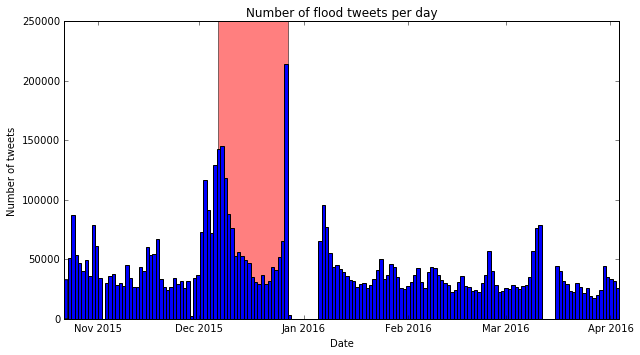

In [30]:
import datetime

figsize(9, 5)
h = hist(dates, bins=days)
fill_between([seldatemin, seldatemax], 0, 250000, facecolor='red', alpha=0.5,)

xlabel('Date')
ylabel('Number of tweets')
title('Number of flood tweets per day')
tight_layout()
savefig('num-tweets.png', dpi=200, alpha=True)